In [1]:
import pandas as pd
import numpy as np
import os

def infoFile(fname='boston.txt', **kwargs):
    with open(fname) as file:
        # Line listing column_names
        column_names = list()
        onFeatures = False
        
        for idx, line in enumerate(file):

            if onFeatures:
                feature = line.split('\t')[0]
                column_names.append(feature[1: feature.find("   ")])
                
            if ("Variable" in line.split('\t')[0]):
                onFeatures = True
                
            elif ("MEDV" in line.split('\t')[0]):
                onFeatures = False

    
    raw_df = pd.read_csv(fname, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
                 
    return data, target, column_names

In [2]:
X_data, y_target, column_names = infoFile(fname='boston.txt')

In [3]:
boston_df = pd.DataFrame(data=np.concatenate((X_data, y_target.reshape(506, 1)), axis=1),
                              columns=column_names)

In [4]:
# Successfully made our very own dataframe!
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO pupil-teacher ratio by town,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# MEDV is the predicting feature
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO  pupil-teacher ratio by town', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
# Since full_dataframe already includes predicting feature,
# no need for it in column_names, as we will use the variable
del column_names[-1]

In [8]:
# To show we deleted predicting feature for column_names
assert len(boston_df.columns) - len(column_names) == 1

In [9]:
# How many features there are
X_data.shape

(506, 13)

In [10]:
# See how many samples/instances there are
# assert X_data.shape[0].equals(y_target.shape[0])
y_target.shape

(506,)

In [11]:
# Check for null values, quicker with full_dataframe
boston_df.isna().sum()

CRIM                                    0
ZN                                      0
INDUS                                   0
CHAS                                    0
NOX                                     0
RM                                      0
AGE                                     0
DIS                                     0
RAD                                     0
TAX                                     0
PTRATIO  pupil-teacher ratio by town    0
B                                       0
LSTAT                                   0
MEDV                                    0
dtype: int64

#### Explore dataframe a little more

In [13]:
boston_df.dtypes

CRIM                                    float64
ZN                                      float64
INDUS                                   float64
CHAS                                    float64
NOX                                     float64
RM                                      float64
AGE                                     float64
DIS                                     float64
RAD                                     float64
TAX                                     float64
PTRATIO  pupil-teacher ratio by town    float64
B                                       float64
LSTAT                                   float64
MEDV                                    float64
dtype: object

In [12]:
# Too many features for me to be able to understand this
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO pupil-teacher ratio by town,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.25)

In [23]:
# This is how we access each value per feature
# the 3 below indicates the forth feature: CHAS
for row in range(10):
    print(X_train[row, 3])

column_names[3]

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0


'CHAS'

In [24]:
(X_train[:, 3] == 0).sum()

351

In [25]:
(X_train[:, 3] == 1).sum()

28

In [60]:
import matplotlib.pyplot as plt


class VisualizeBoston:
    
    # User can input __init__ either
    # .csv dataframe or all the following: X_data, y_target, and columns
    def __init__(self, **kwargs):
        
        # When only dataframe is passed
        if ("dataframe" == list(kwargs.keys())[0] ):
            self.dataframe = kwargs.get("dataframe")
        
        elif bool(kwargs):
            self.data = kwargs.X_data
            self.target = kwargs.y_data
            self.columns = kwargs.column_names
    
    def VisualizeBoston(self, **kwargs):
        self.__init__(**kwargs)
        
    def correlation(self, dataframe=self.dataframe):
        assert dataframe.type == pd.DataFrame
        corr_matrix = dataframe.corr()
        
        cb = plt.colorbar()
        cb.ax.tick_params(labelsize=14)
        
        if eval(input("Save it? ")):
            # Save the file/image
            pass
    
    @static
    def correlation(self, X_data=self.data, y_target=self.target, column_names=self.columns):
        try:
            pd.DataFrame(data=X_data, target=y_target, columns=column_names)
        except Exception as e:
            print(type(e))
        
        #corr_matrix = 

    def occurancesPerColumn(self, **kwargs):
        for column, feature in enumerate(self.columns):

            unique = np.unique(self.data[:, column])
            if unique.shape > (10,):
                continue

            counts = [(X_data[:, column] == val).sum() for val in unique]

            plt.title("Feature: " + feature)
            plt.xlabel(feature + " instance")
            plt.ylabel("Number of occurances")

            # Binary
            if unique.shape == (2,):
                plt.xticks([0, 1])

            plt.bar(unique, counts, color="r", width=0.9)
            plt.show()
            
    def skewData(X_data):
        

In [62]:
visual = VisualizeBoston(dataframe="woah")

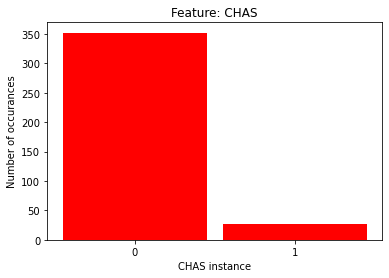

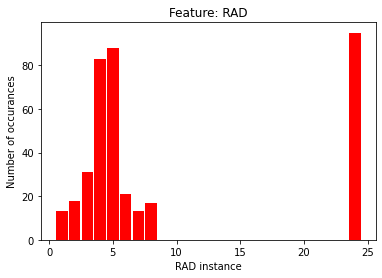

In [23]:
# Most of CHAS instances are 0
# Popular is RAD=4, 5, and, 24
occurancesPerColumn(X_train)

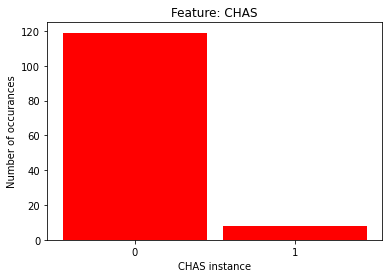

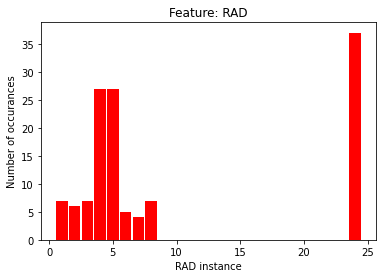

In [24]:
occurancesPerColumn(X_test)

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model = Ridge()

param = {
    'solver':['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept':[True, False],
    'normalize':[True, False]
}

# define search
search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs=-1)
# execute search
result = search.fit(X_train, y_train)

In [33]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -3.351619404597664
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}


In [36]:
house_pred = Ridge(alpha=0.1, fit_intercept=True, normalize=True, solver="lsqr")
house_pred.fit(X_train, y_train)

Ridge(alpha=0.1, normalize=True, solver='lsqr')

In [38]:
y_pred = house_pred.predict(X_test)

In [40]:
# Not terrible
house_pred.score(X_test, y_test)

0.7146114462086937